<h1> Buổi 01 bài 01

<h3>Import các thu viện numpy, pandas, matplotlib và seaborn

In [1]:
# Linear algebra
import numpy as np
# Data processing
import pandas as pd
# Data vissualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

<p>Đọc dữ liệu đầu vào

In [2]:
with open("E:\\titanic.csv") as f:
    df = pd.read_csv(f, dtype ={'age':np.float64,'sibsp':np.int64,'parch':np.int64})

<p>Xem xét dữ liệu ban đầu với hàm head() và info()

In [3]:
df.head(12)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<p>Thống kê chỉ số của các thuộc tính định lượng như: đếm số giá trị, giá trị lớn nhất, giá trị nhỏ nhất, trung bình, độ lệch chuẩn, tứ phân vị

In [20]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<h3>Lấy ra 5 thuộc tính có số lượng giá trị rộng nhiều nhất

In [21]:
total = df.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df.isnull().sum()/df.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


Có thể nhận thấy thuộc tính body hiện đang thiếu dữ liệu rất nghiêm trọng (90.8%), điều này sẽ gây ảnh hưởng lớn nếu sử dụng thuộc tính này trong quá trình khai thác.


<h3>Xem xét thống kê giữa thuộc tính Độ tuổi (age), Giới tính (sex) và khả năng sống sót (survived)

C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


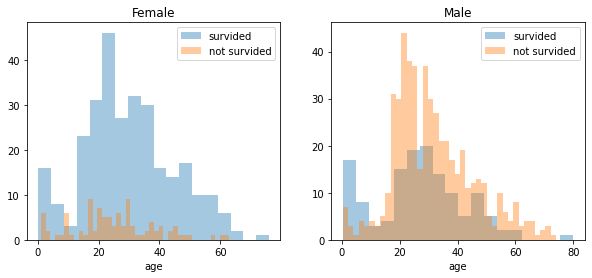

In [24]:
survived = 'survided'
not_survived ='not survided'
fig, axes = plt.subplots(nrows = 1,ncols =2,figsize = (10,4))
women = df[df['sex']=='female']
men = df[df['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins = 18,label =survived, ax =axes[0],kde = False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins = 40,label =not_survived, ax =axes[0],kde = False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins = 18,label =survived, ax =axes[1],kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins = 40,label =not_survived, ax =axes[1],kde = False)
ax.legend()
_=ax.set_title('Male')

<p>Từ biểu đồ trên có thể rút ra vài nhận xét như sau:
<ul>
<li>Xác suất nam sống sót cao ở tuổi từ 1 đến 10</li>
<li>Cơ hội sống sót của nữ cao hơn từ 12 đến 40 tuổi</li>
<li>Xác suất nam không sống sót cao nhất ở độ tuổi từ 18 đến 27</li>
<li>Nhìn chung tỷ lệ sống sót của nữ ở các lứa tuổi đều có phần nhỉnh hơn nam</li>
</ul>


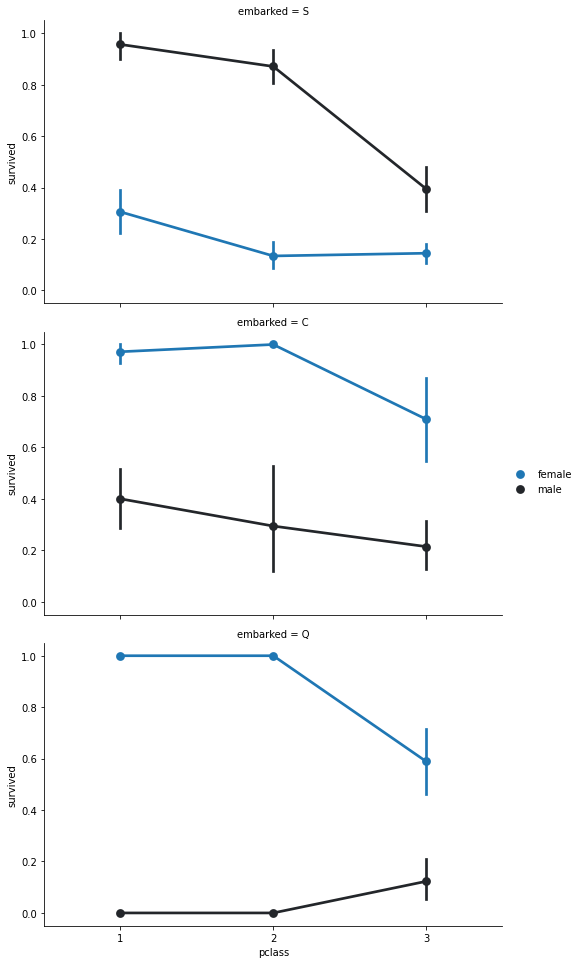

In [25]:
FacetGrid = sns.FacetGrid(df,row='embarked',height =4.5, aspect =1.6)
FacetGrid.map(sns.pointplot,'pclass','survived','sex',palette = None, order =None, hue_order = None)
FacetGrid.add_legend()

<p>Từ biểu đồ trên có thể thấy được, thuộc tính Cổng lên tàu có thể liên quan đến khả năng
sống sót và phụ thuộc vào giới tính</p>
<p>Phụ nữ lên tàu ở cổng Q và cổng S có cơ hội sống cao hơn và ngược lại, lên tàu ở cổng C phụ nữ có tỉ lệ chết cao hơn. </p>
<p>Đồng nghĩa với tỉ lệ sống sót của đàn ông lên tàu ở cổng C cao hơn so với cổng Q và S.</p>
<p>Loại vé cũng có thể liên quan đến tỉ lệ sống sót, vì thế, tiếp tục tìm hiểu kỹ hơn về sự phụ thuộc giữa thuộc tính này với thuộc tính quyết định.</p>

<AxesSubplot:xlabel='pclass', ylabel='survived'>

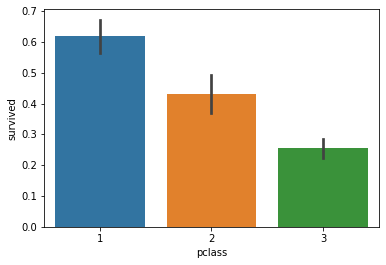

In [26]:
sns.barplot(x='pclass',y='survived',data=df)

<p>Từ biểu đồ này có thể thấy được rõ ràng tỷ lệ sống sót của loại vé 1 là cao nhất.

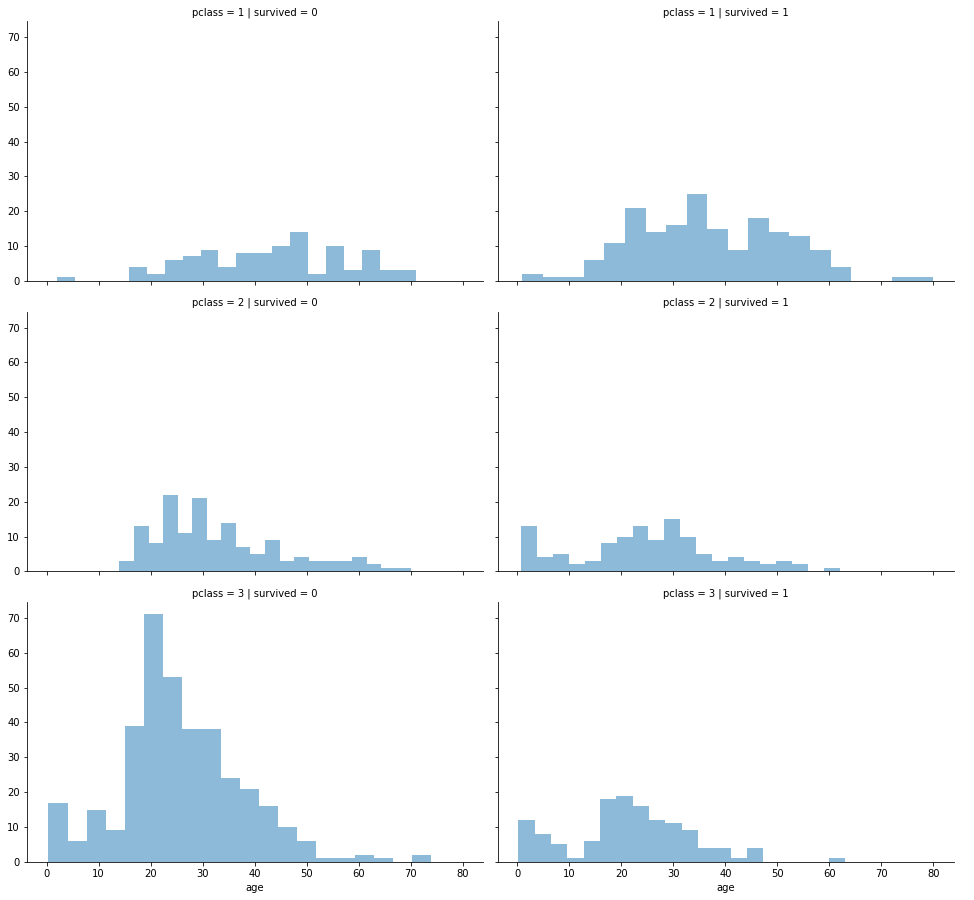

In [27]:
grid = sns.FacetGrid(df,col='survived',row = 'pclass', height =4.2,aspect=1.6)
grid.map(plt.hist,'age',alpha=.5,bins=20)
grid.add_legend()

<p>Từ đồ thị trên có thể xác nhận nhận định bên trên về loại vé 1, và có thể đưa ra thêm nhận định những người có loại vé 3 thì có tỷ lệ không sống sót lớn.


<h3>Thống kê số người đi cùng (anh chị em/vợ chồng hoặc cha mẹ/con cái)

In [28]:
for dataset in [df]:
    dataset['relatives']= dataset['sibsp']+dataset['parch']
    dataset.loc[dataset['relatives']>0,'not_alone']=0
    dataset.loc[dataset['relatives']==0,'not_alone']=1
    dataset['not_alone']= dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

1    790
0    519
Name: not_alone, dtype: int64

<ul>
    <li>Số người đi một mình là 790 người</li>
    <li>Số người đi cùng người thân là 519 người</li>
</ul>
<p>Vẽ biểu đồ biểu diễn mối quan hệ giữa số người đi cùng và khả năng sống sót


C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


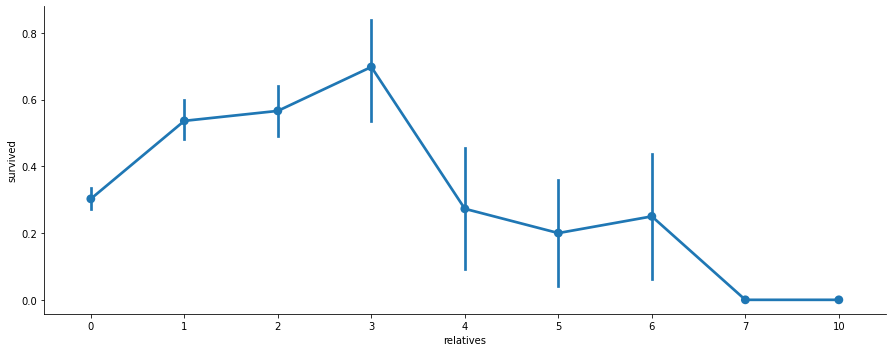

In [29]:
axes = sns.catplot('relatives','survived',data=df,aspect=2.5,kind='point',)

<p>Sơ đồ trên cho ta thấy, những người có 1 đến 3 người thân đi cùng có tỉ lệ sống sót cao hơn. Những người có 7 đến 10 người thân đi cùng thì có tỉ lệ sống thấp nhất.


<h3>Tiền xử lý dữ liệu

<p>Đầu tiên, tiến hành xem xét các thuộc tính thiếu sót nhiều giá trị. Có thể xóa đi các thuộc tính body, cabin, boat, home.dest vì không có ảnh hưởng nhiều đến sự tồn tại của hành khách. Tuy nhiên, mỗi giá trị của thuộc tính cabin ví dụ như ‘C123’ có các ký tự đầu ‘C’ là boong mà hành khách đó đang đi. Dữ liệu này có thể hữu ích nên có thể tách ra, giữ lại trước khi xóa.

In [30]:
import re

deck = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}

for dataset in [df]:
    dataset['cabin']= dataset['cabin'].fillna("U0") #Điền "U0" vào những ô trống
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z])+").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int) #đổi kiểu dữ liệu int
#drop cabin
df = df.drop(['cabin'],axis =1)

<p>Xem xét thuộc tính ticket

In [31]:
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

<p>Có thể thấy thuộc tính ticket có đến 929 giá trị khác nhau, có khả năng thuộc tính này sẽ không giúp ích được trong quá trình khai thác, ngược lại còn gây sai số cho thuật toán nên có thể xóa nó đi.</p>

<p>Thực hiện xóa các thuộc tính không cần thiết.</p>

In [32]:
df=df.drop(['ticket'],axis=1)
df= df.drop(['boat'],axis=1)
df=df.drop(['body'],axis=1)
df=df.drop(['home.dest'],axis=1)

Điền giá trị còn thiếu vào thuộc tính tuổi (age).<br>
Các giá trị này sẽ được sinh ngẫu nhiên dựa vào giá trị trung bình, độ lệch chuẩn và số các giá trị còn thiếu.


In [33]:
for dataset in [df]:
    #Tính trung bình tuổi
    mean = df["age"].mean() 
    #Tính độ lệch chuẩn tuổi
    std = df["age"].std() 
    is_null = dataset["age"].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=is_null)
    #Điền giá trị NAN vào cột tuổi với các giá trị ngẫu nhiên
    age_slice  = dataset["age"].copy()
    age_slice[np.isnan(age_slice)]= rand_age
    dataset["age"]=age_slice
    dataset["age"]=df["age"].astype(int)
df["age"].isnull().sum() 

0

Điền giá trị còn thiếu vào thuộc tính Cổng lên tàu (embarked)<br> 
Xem xét thông tin về thuộc tính này

In [34]:
df['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

<p>Ta thấy, giá trị ‘S’ là phổ biến nhất, nên có thể chọn nó đề điền vào các vị trí còn trống.

In [35]:
common_value='S'

for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

<h3>Xem lại các thuộc tính

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   int32  
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   fare       1308 non-null   float64
 8   embarked   1309 non-null   object 
 9   relatives  1309 non-null   int64  
 10  not_alone  1309 non-null   int32  
 11  deck       1309 non-null   int32  
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 107.5+ KB


Có thể thấy, thuộc tính giá vé (fare) có các giá trị nguyên nhưng đang có kiểu dữ liệu là float nên có thể chuyển đổi về kiểu nguyên. Ngoài ra, có thể xử lý các thuộc tính Tên (name), Giới tính (sex), Cổng lên tàu (Embarked).<br>
Đối với thuộc tính giá vé


In [37]:
for dataset in [df]:
    dataset['fare']=dataset['fare'].fillna(0)
    dataset['fare']=dataset['fare'].astype(int)

Đối với thuộc tính tên (name), có thể sẽ trích xuất danh hiệu (title) từ thuộc tính này để xây dựng thuộc tính mới.


In [38]:
titles ={"Mr":1, "Miss":2, "Mrs":3, "Master":4,"Rare":5}

for dataset in [df]:
    dataset['title'] = dataset.name.str.extract('([A-Za-z]+)\.',expand=False)
    dataset['title'] = dataset['title'].replace(['Lady','Countess','Capt','Col','Don','Dr',\
                                                'Major','Rev','Sir','Jonkheer','Done'],'Rare')
    dataset['title'] = dataset['title'].replace('Mlle','Miss')
    dataset['title'] = dataset['title'].replace('Ms','Miss')
    dataset['title'] = dataset['title'].replace('Mme','Mrs')
    #convert
    dataset['title']=dataset['title'].map(titles)
    #filling NaNy with 0
    dataset['title']=dataset['title'].fillna(0)
df =df.drop(['name'],axis=1)

<p>Biểu diễn thuộc tính giới tính (sex) thành các giá trị 0 (nam), 1 (nữ)

In [39]:
genders ={"male":0,"female":1}

for dataset in [df]:
    dataset['sex']=dataset['sex'].map(genders)

<p>Chuyển đổi thuộc tính cổng lên tàu (embarked) thành số

In [40]:
ports = {"S":0,"C":1,"Q":2}

for dataset in [df]:
    dataset['embarked']= dataset['embarked'].map(ports)

<p>Chuyển đổi thuộc tính tuổi (age) về kiểu số nguyên và tạo ra các nhóm tuổi chia giá trị tuổi thành 8 nhóm nhỏ có số lượng hành khách tương đối đều nhau:
<ul>
    <li>Nhóm 1: dưới 11 tuổi
    <li>Nhóm 2: trên 11 tuổi đến 18 tuổi
    <li>Nhóm 3: trên 18 tuổi đến 22 tuổi
    <li>Nhóm 4: trên 22 tuổi đến 27 tuổi
    <li>Nhóm 5: trên 27 tuổi đến 33 tuổi
    <li>Nhóm 6: trên 33 tuổi đến 40 tuổi
    <li>Nhóm 7: trên 40 tuổi đến 66 tuổi
    <li>Nhóm 8: trên 66 tuổi
</ul>

In [41]:
for dataset in [df]:
    dataset['age']=dataset['age'].astype(int)
    dataset.loc[dataset['age']<=11,'age']=0
    dataset.loc[(dataset['age']>11) & (dataset['age']<=18),'age']=1
    dataset.loc[(dataset['age']>18) & (dataset['age']<=22),'age']=2
    dataset.loc[(dataset['age']>22) & (dataset['age']<=27),'age']=3
    dataset.loc[(dataset['age']>27) & (dataset['age']<=33),'age']=4
    dataset.loc[(dataset['age']>33) & (dataset['age']<=40),'age']=5
    dataset.loc[(dataset['age']>40) & (dataset['age']<=66),'age']=6
    dataset.loc[dataset['age']>66,'age']=7

<p>Kiểm tra kết quả đạt được

In [42]:
df['age'].value_counts()

4    238
6    235
3    213
5    193
2    179
1    151
0     91
7      9
Name: age, dtype: int64

<p>Đối với thuộc tính giá vé (fare), có thể làm tương tự như đối với thuộc tính tuổi (age). Tuy nhiên, để tránh tình trạng số lượng hành khách tập trung quá nhiều vào một nhóm nào đó, có thể sử dụng hàm qcut() của thư viện sklearn.

In [44]:
for dataset in [df]:
    dataset.loc[dataset['fare']<=7.91,'fare']=0
    dataset.loc[(dataset['fare']>7.91) & (dataset['fare']<=14.454),'fare']=1
    dataset.loc[(dataset['fare']>14.454) & (dataset['fare']<=31),'fare']=2
    dataset.loc[(dataset['fare']>31) & (dataset['fare']<=99),'fare']=3
    dataset.loc[(dataset['fare']>99) & (dataset['fare']<=250),'fare']=4
    dataset.loc[dataset['fare']>250,'fare']=5
    dataset['fare']=dataset['fare'].astype(int)

<h3>Tạo thuộc tính tuổi * loại vé (age_class)

In [45]:
for dataset in [df]:
    dataset['age_class']= dataset['age']*dataset['pclass']

<p>Tạo thuộc tính giá vé trên mỗi người (fare_per_person)

In [46]:
#Thuộc tính giá vé trên mỗi người
for dataset in [df]:
    dataset['fare_per_person']= dataset['fare']/(dataset['relatives']+1)
    dataset['fare_per_person']= dataset['fare_per_person'].astype(int)
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title,age_class,fare_per_person
0,1,1,1,4,0,0,0,0,0,1,2,2.0,4,0
1,1,1,0,0,1,2,0,0,3,0,3,4.0,0,0
2,1,0,1,0,1,2,0,0,3,0,3,2.0,0,0
3,1,0,0,4,1,2,0,0,3,0,3,1.0,4,0
4,1,0,1,3,1,2,0,0,3,0,3,3.0,3,0
5,1,1,0,6,0,0,0,0,0,1,5,1.0,6,0
6,1,1,1,6,1,0,0,0,1,0,4,2.0,6,0
7,1,0,0,5,0,0,0,0,0,1,1,1.0,5,0
8,1,1,1,6,2,0,0,0,2,0,3,3.0,6,0
9,1,0,0,7,0,0,0,1,0,1,8,1.0,7,0
